![CampusX - Sequential Workflows in LangGraph Agentic AI using LangGraph Video 5 CampusX [bAWujyAl1Kk - 935x526 - 9m01s].png](<attachment:CampusX - Sequential Workflows in LangGraph Agentic AI using LangGraph Video 5 CampusX [bAWujyAl1Kk - 935x526 - 9m01s].png>)
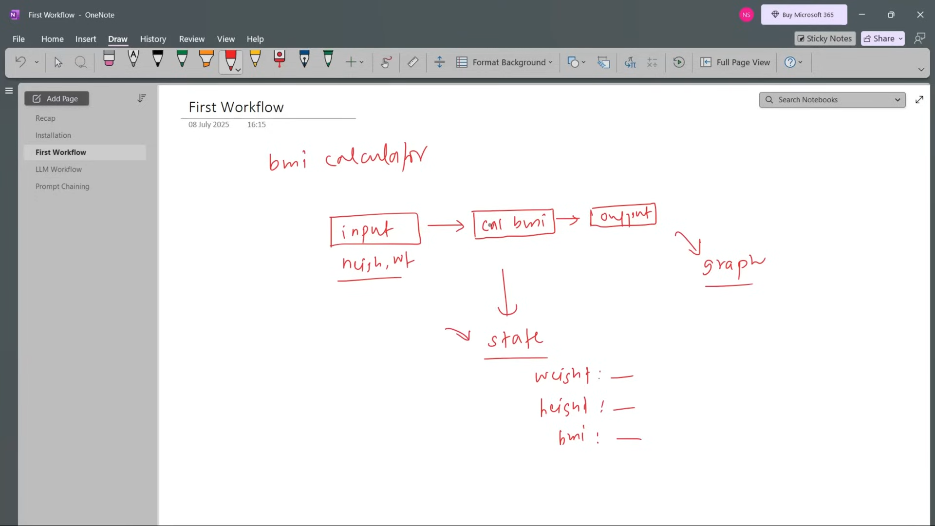

# <b>Graph That we will Build

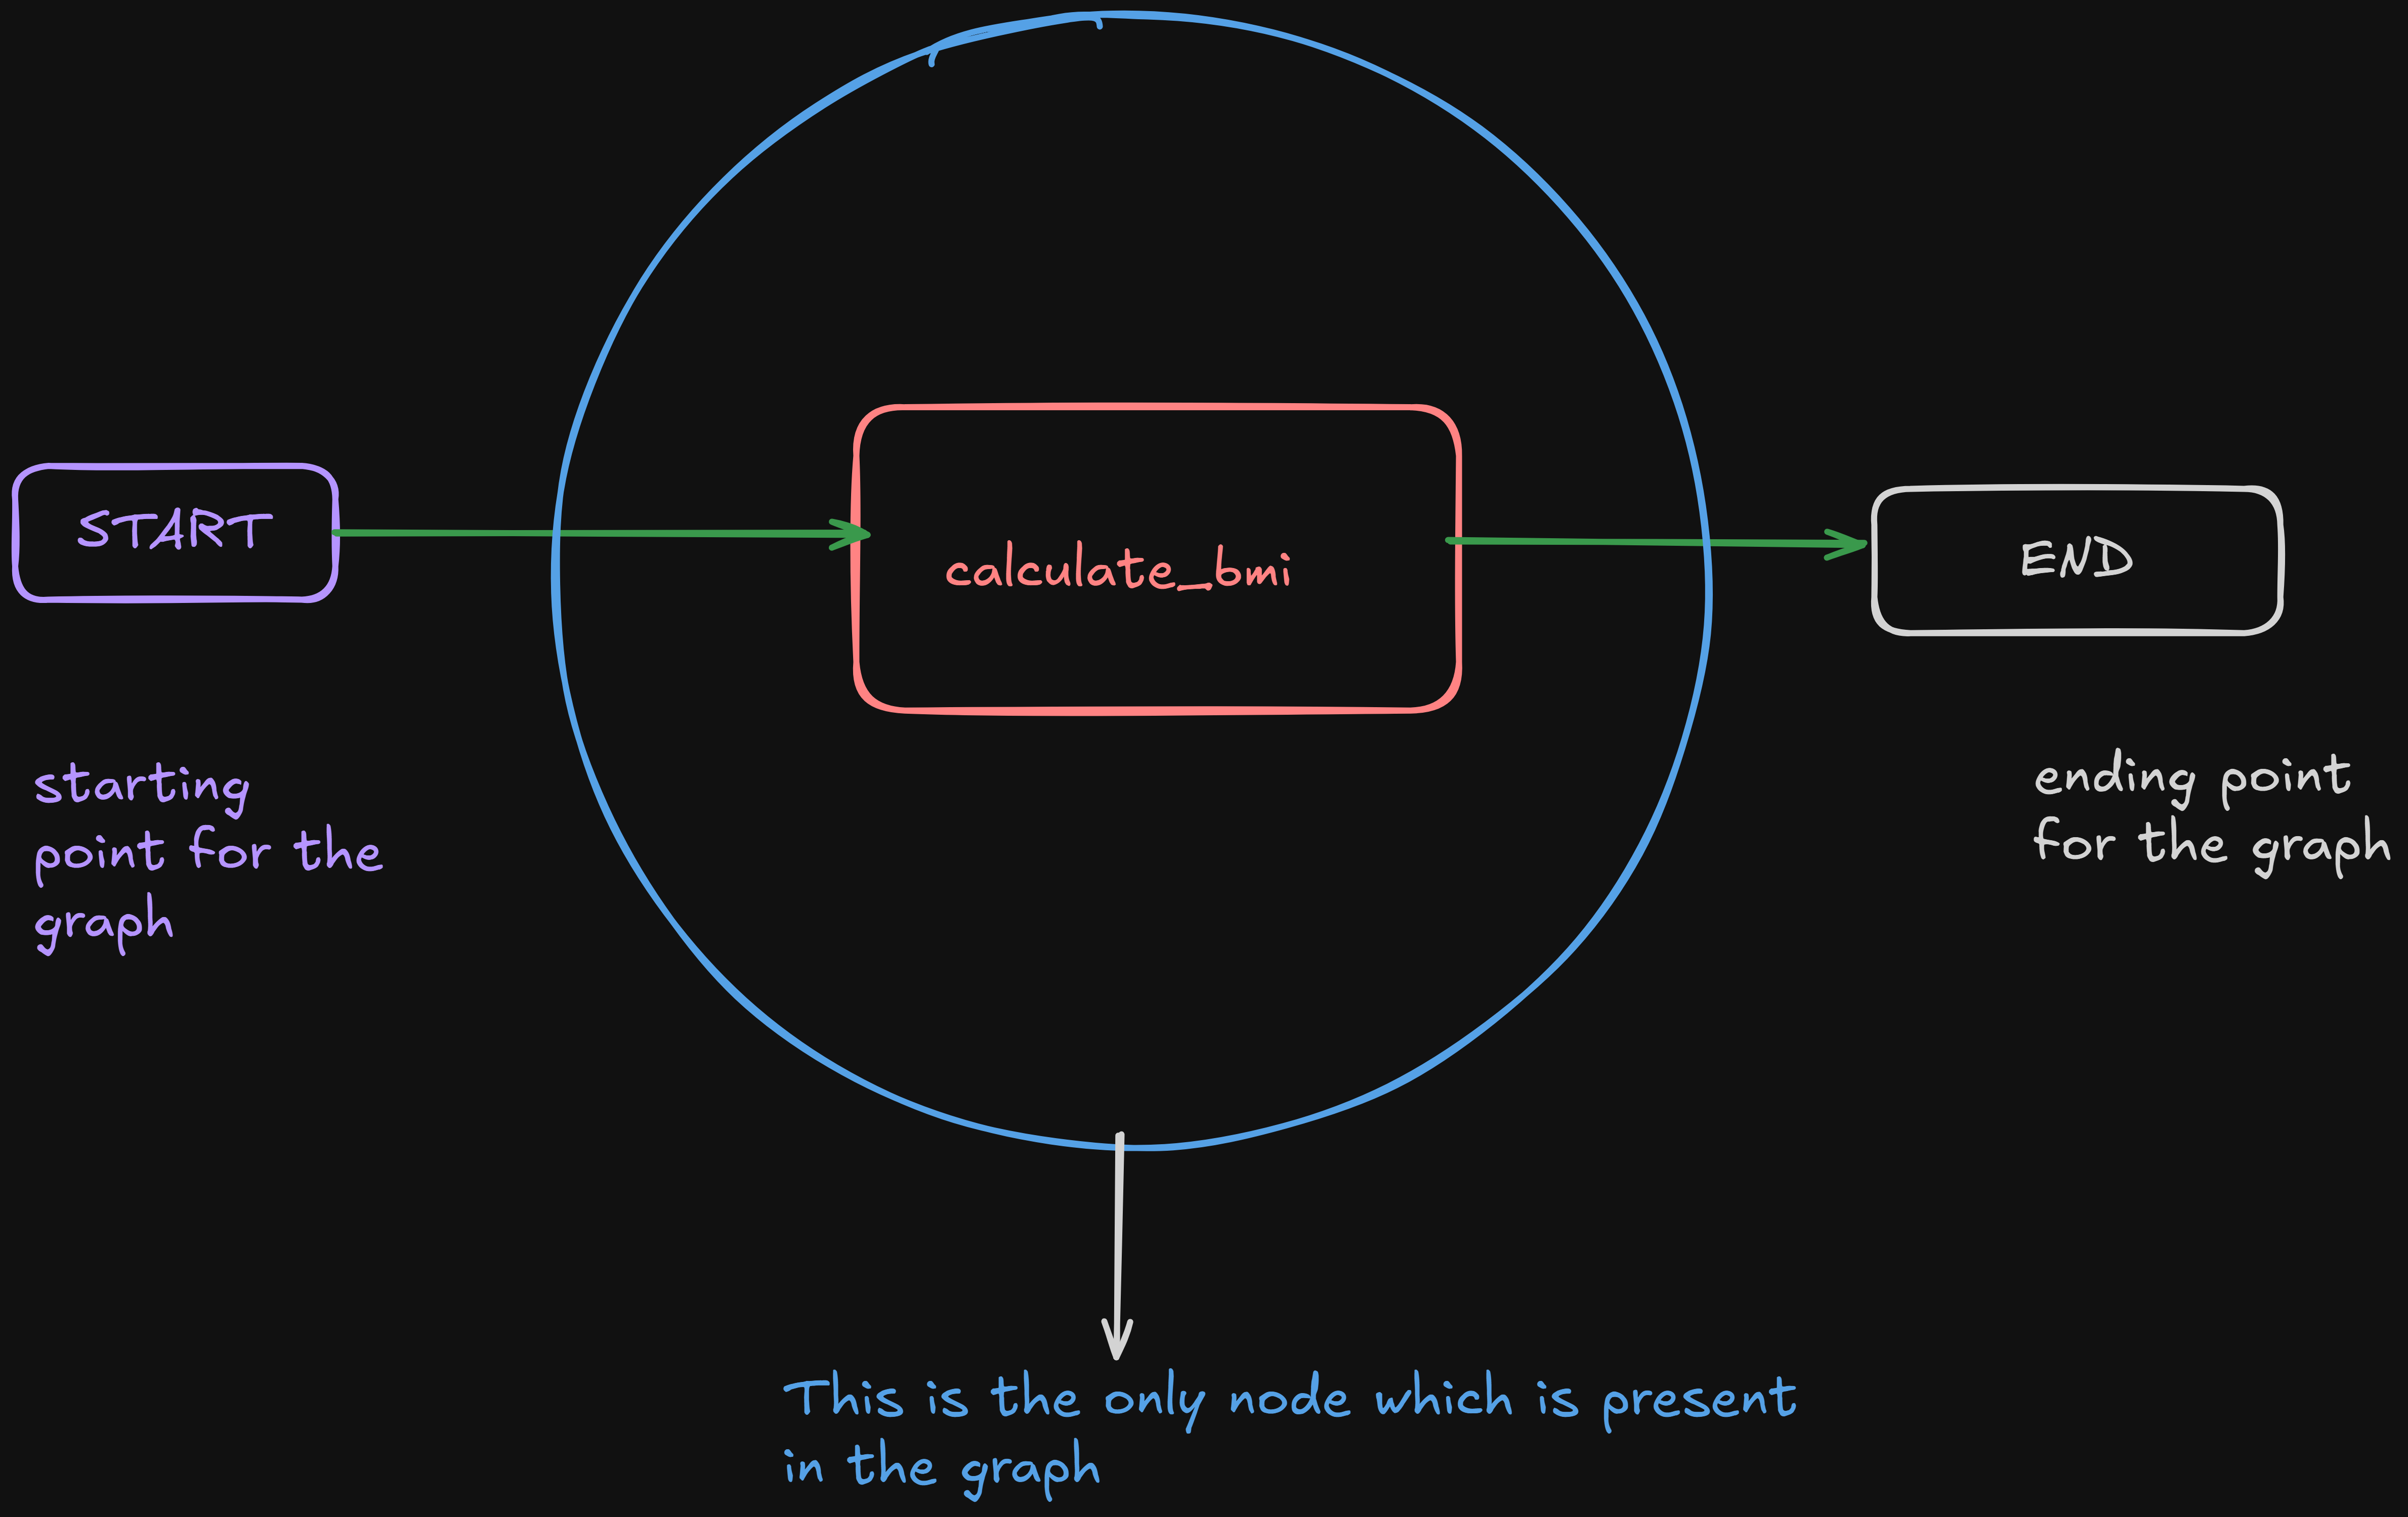

In [8]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

# <b>Creating states

In [3]:
# define state
class BMIState(TypedDict):
    weight_kg:float
    height_m:float
    bmi:float


# <b>Step by step to create the graph

### <b>Step1:-define your graph

In [6]:
graph = StateGraph(BMIState)

### <b>Step2:-add nodes to your graph

In [7]:
def  calculate_bmi(state: BMIState) -> BMIState:
    state['bmi'] = state['weight_kg'] / (state['height_m'] ** 2)
    return state

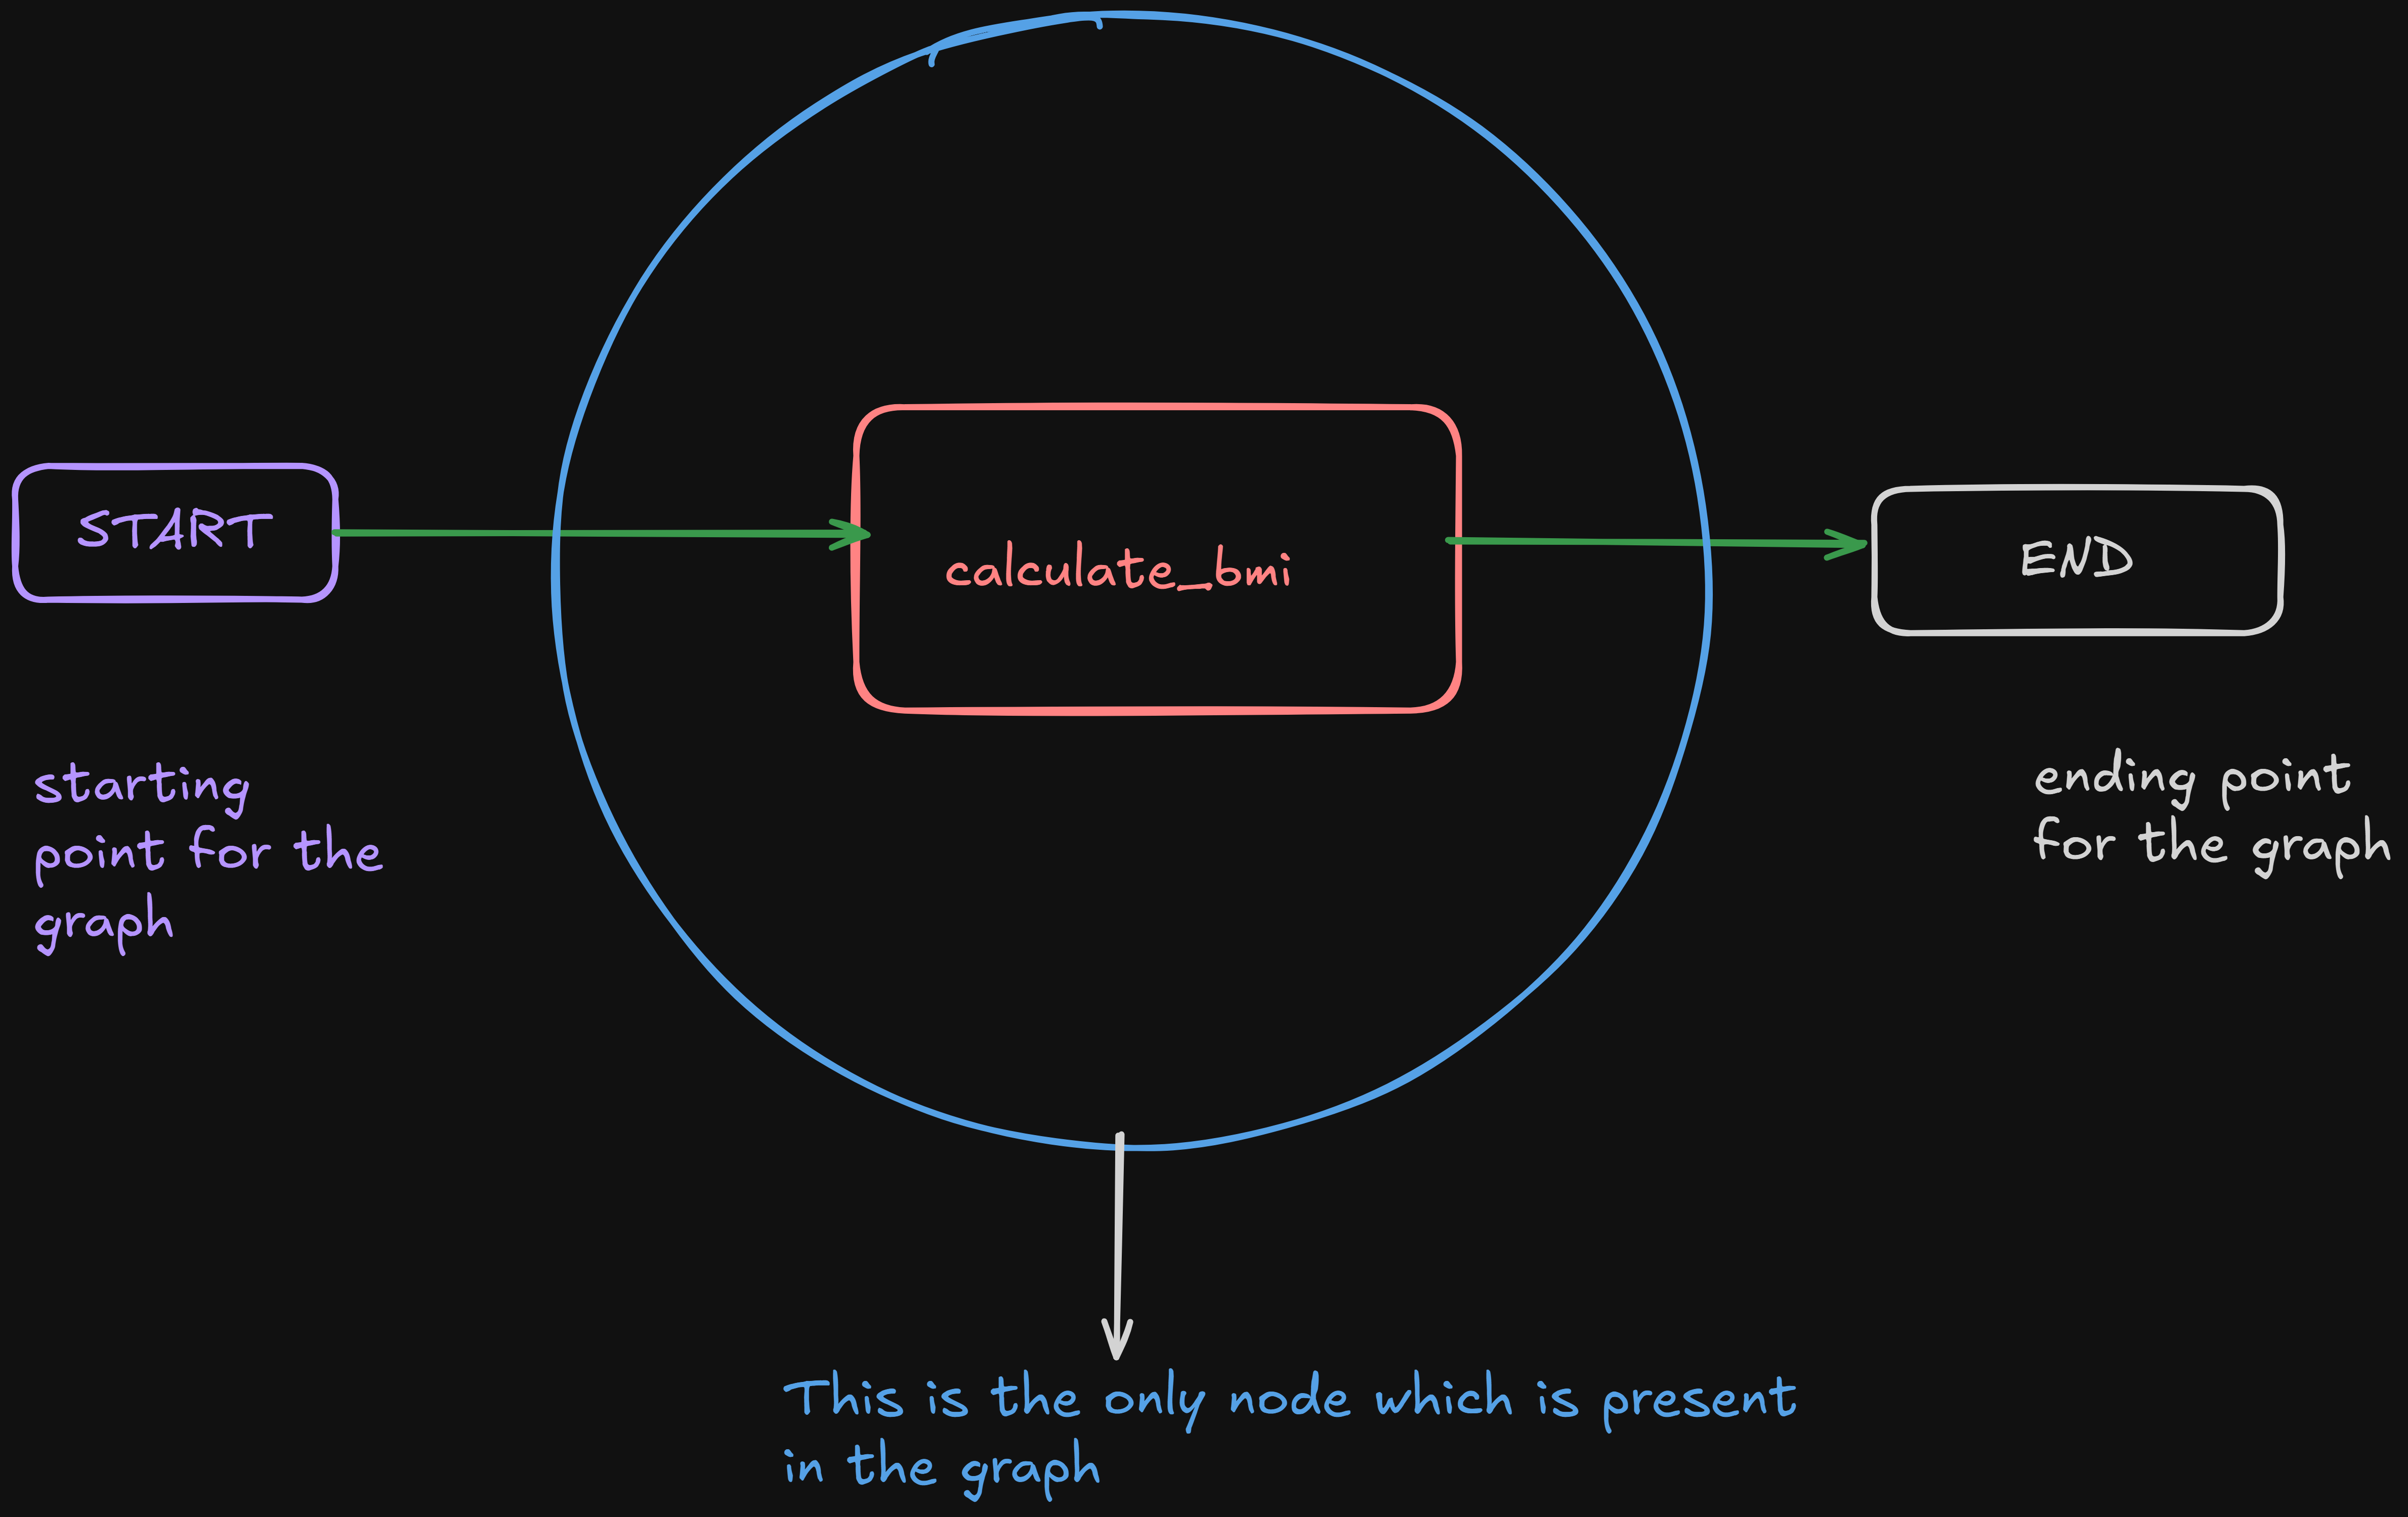

In [9]:
graph.add_node('calculate_bmi',calculate_bmi)

### <b>Step3:-add edges to graph

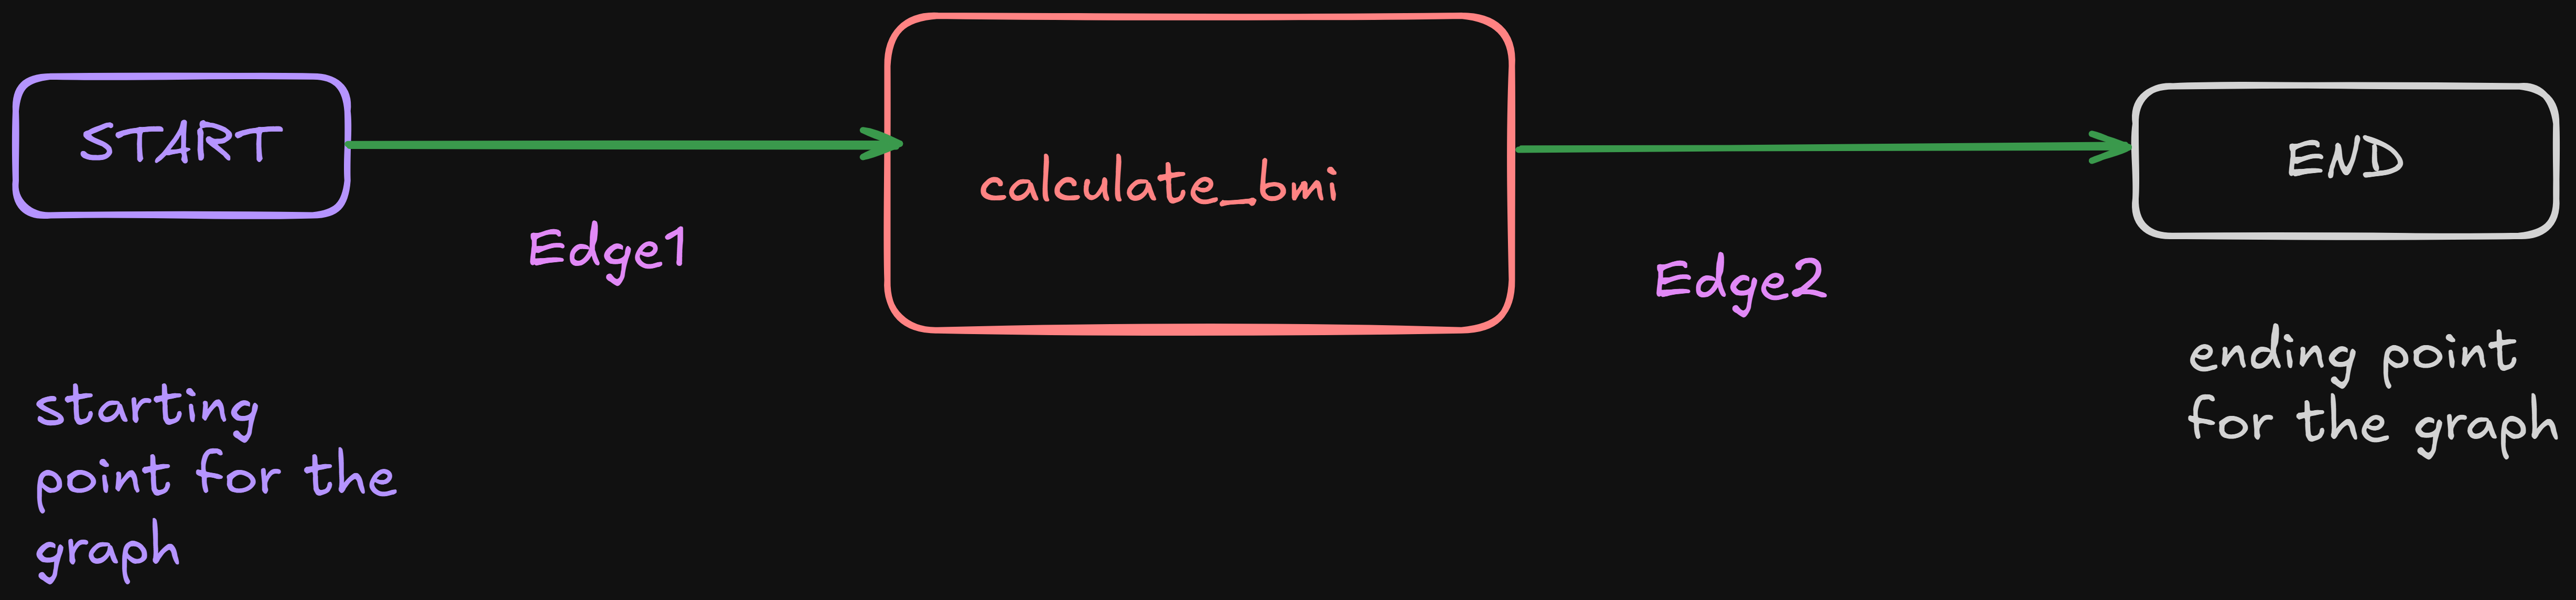

In [10]:
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi',END)

### <b>Step4:- compile the graph

In [11]:
workflow=graph.compile()

### <b>Step5:-execute the graph

In [13]:
initial_state={
        'weight_kg':80,
        'height_m':1.3
    }

In [14]:
output_state=workflow.invoke(initial_state)

### <b>Step6:-visualizing the Graph

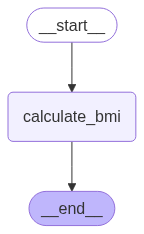

In [16]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
# getting mermaid drawing
print(workflow.get_graph().draw_mermaid())


---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	calculate_bmi(calculate_bmi)
	__end__([<p>__end__</p>]):::last
	__start__ --> calculate_bmi;
	calculate_bmi --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc

